<a href="https://colab.research.google.com/github/HirunaD/TensorFlow/blob/main/3_Regression_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# download abd install "opendatasets" packege from python packege index
!pip install opendatasets

In [4]:
# import libraries
import pandas as pd # to data visulyzing and manipulation
import matplotlib.pyplot as plt # to visualizing data
import tensorflow as tf # to build nueral networks
import opendatasets as od # to download opendatasets (kaggle etc.)

In [5]:
# to download dataset from kaggle
od.download("https://www.kaggle.com/datasets/andonians/random-linear-regression")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: hirunadesilva
Your Kaggle Key: ··········


100%|██████████| 7.63k/7.63k [00:00<00:00, 3.15MB/s]

In [6]:
# load the train.csv
data = pd.read_csv("random-linear-regression/test.csv")

In [7]:
# to look first 5 data in the dataset
data.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['x'].plot(kind='hist', bins=20, title='x')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['y'].plot(kind='hist', bins=20, title='y')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='index', y='x', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='x', y='y', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['x']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('x')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['y']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('y')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_8['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['x'].plot(kind='line', figsize=(8, 4), title='x')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['y'].plot(kind='line', figsize=(8, 4), title='y')
plt.gca().spines[['top', 'right']].set_visible(False)

In [8]:
# to look data shape of the dataset
data.shape

(300, 2)

In [9]:
# divide data into features and labels
X = data["x"] # feature column
y = data["y"] # label column

In [10]:
# review feature values
X

0      77
1      21
2      22
3      20
4      36
       ..
295    71
296    46
297    55
298    62
299    47
Name: x, Length: 300, dtype: int64

In [11]:
# review label values
y

0      79.775152
1      23.177279
2      25.609262
3      17.857388
4      41.849864
         ...    
295    68.545888
296    47.334876
297    54.090637
298    63.297171
299    52.459467
Name: y, Length: 300, dtype: float64

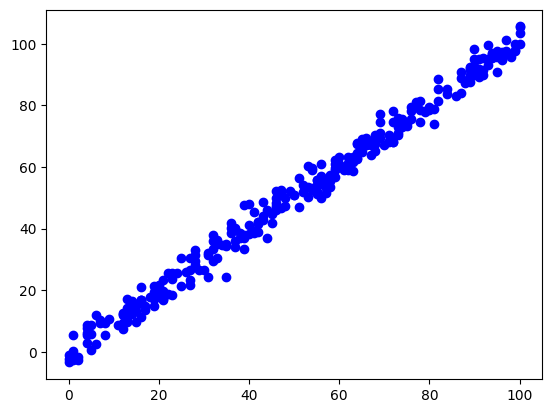

In [12]:
# visualizing the data in blue color
plt.scatter(X, y, c='b')
plt.show()

In [13]:
# split data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# shape of training and testing dataset
X_train.shape, X_test.shape

((240,), (60,))

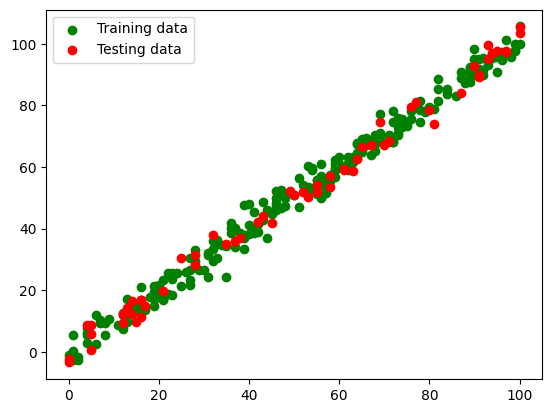

In [15]:
# visualizing training and testing dataset
plt.scatter(X_train, y_train, c='g', label='Training data') # show "Training data" in green
plt.scatter(X_test, y_test, c='r', label='Testing data') # show "Testing data" in red
plt.legend() # include legend
plt.show()

In [16]:
# create a model
model = tf.keras.Sequential([ # Create a Sequential model
    tf.keras.layers.Dense(4,input_shape=(1,)), # First Dense layer (Hidden layer) with 4 units and input shape of (1,)
    tf.keras.layers.Dense(1) # Second Dense layer (Output layer) with 1 unit (output layer)
])

In [17]:
# compile the model
model.compile(
    loss = tf.keras.losses.mae, # Specify the loss function (Mean Absolute Error)
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01), # Specify the optimizer (Adam optimizer with learning rate of 0.01)
    metrics = ["mae"] # Specify the evaluation metric (Mean Absolute Error)
)

In [18]:
# train the model
epoch_number = 4 # No. of epochs for training
history = model.fit(
    tf.expand_dims(X_train, axis=-1), # Input data: X_train (expanded to include an extra dimension)
    y_train, # Target labels: y_train
    epochs = epoch_number
)

Epoch 1/4
8/8 [==============================] - 1s 3ms/step - loss: 2.5055 - mae: 2.5055
Epoch 2/4
8/8 [==============================] - 0s 3ms/step - loss: 2.4309 - mae: 2.4309
Epoch 3/4
8/8 [==============================] - 0s 3ms/step - loss: 2.4579 - mae: 2.4579
Epoch 4/4
8/8 [==============================] - 0s 3ms/step - loss: 2.4746 - mae: 2.4746


In [19]:
# see model info
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 8         
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# predicted y values
y_pred = model.predict(X_test)
y_pred[:5]

2/2 [==============================] - 0s 10ms/step


array([[89.833405],
       [75.854416],
       [93.8274  ],
       [ 4.96098 ],
       [90.83191 ]], dtype=float32)

In [21]:
# actual y values
y_test[:5]

203    92.887723
266    79.503415
152    97.001484
9       8.746748
233    89.739520
Name: y, dtype: float64

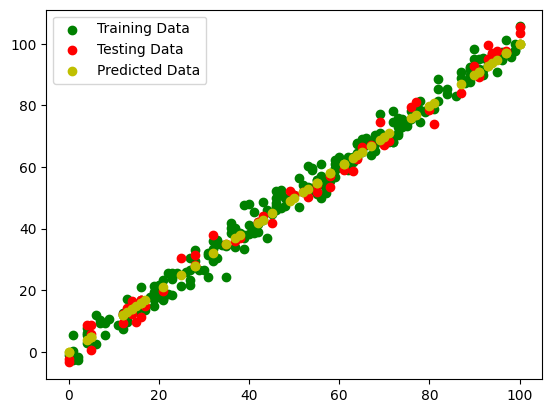

In [24]:
# visualize training, testing and predicted data
plt.scatter(X_train, y_train, c='g', label='Training Data')
plt.scatter(X_test, y_test, c='r', label='Testing Data')
plt.scatter(X_test, y_pred, c='y', label='Predicted Data')
plt.legend()
plt.show()

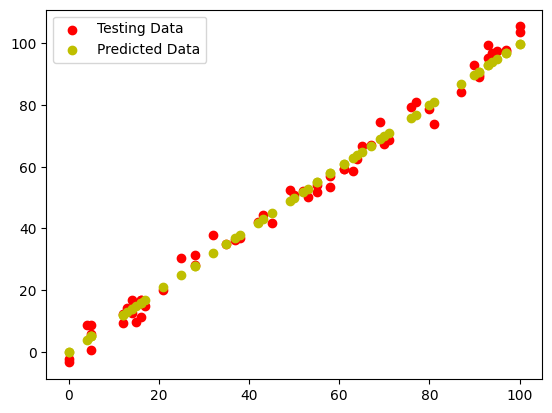

In [25]:
# visualize testing and predicted data
plt.scatter(X_test, y_test, c='r', label='Testing Data')
plt.scatter(X_test, y_pred, c='y', label='Predicted Data')
plt.legend()
plt.show()

In [26]:
# evaluate the model using evaluate method
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 15ms/step - loss: 2.5184 - mae: 2.5184


[2.518388032913208, 2.518388032913208]

In [27]:
# Using MAE (Mean Absolute Error)
mae = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred)) # squeeze function used to remove dimensions of size 1
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.5183876>

In [28]:
# Using MSE (Mean Squared Error)
mse = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=9.50902>

In [29]:
# history of the loss & mae
history.history

{'loss': [2.5055489540100098,
  2.430905818939209,
  2.457878351211548,
  2.4746334552764893],
 'mae': [2.5055489540100098,
  2.430905818939209,
  2.457878351211548,
  2.4746334552764893]}

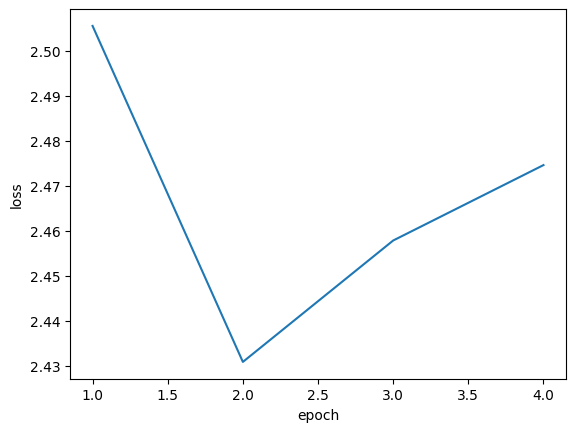

In [30]:
# visualize the loss over epochs
x_range = range(1, epoch_number+1) # Define the range of x values (epochs)
loss = history.history['loss'] # Extract the training loss
plt.plot(x_range, loss) # Plot the training loss over epochs
plt.xlabel('epoch') # Set the label for the x-axis
plt.ylabel('loss') # Set the label for the y-axis
plt.show() # Display the plot

In [31]:
# to see finalized weight values and bias values
for layer in model.layers: # Loop through each layer in the model
    weights = layer.get_weights()[0] # Get the weight values for the current layer
    biases = layer.get_weights()[1] # Get the bias values for the current layer
    print(f"\nWeights:\n {weights} \nBiases:\n {biases}") # Print the weight values and bias values


Weights:
 [[-0.7884824   0.4466387   0.21173145  0.97089356]] 
Biases:
 [ 0.00969975 -0.01010199  0.00772029 -0.01493198]

Weights:
 [[-0.9369779 ]
 [ 0.6290469 ]
 [-0.68608654]
 [ 0.12773576]] 
Biases:
 [-0.00886777]
